In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import swifter
import json
import numpy as np 
from google.cloud import bigquery
from google.oauth2 import service_account

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')
import matplotlib.pylab as pylab
import matplotlib.dates as dates

In [10]:
df_liwc_tweets = pd.read_csv('LIWC_topics_all_tweets_updated.csv')
df_liwc_dropped = df_liwc_tweets.drop(['Topic_Perc_Contrib', 'compound', 'id', 'id_str', 'neg', 'neu', 'pos','full_text'],axis=1)

pivoted_df = pd.pivot_table(df_liwc_dropped, index= 'date', columns= 'Dominant_Topic', aggfunc = 'sum')

In [11]:
four_topics = df_liwc_dropped[df_liwc_dropped['Dominant_Topic'].isin([5,7,8,10])]
four_topics['Dominant_Topic'] = four_topics['Dominant_Topic'].replace(5, 'Funeral')
four_topics['Dominant_Topic'] = four_topics['Dominant_Topic'].replace(7, 'Facts about the shooting')
four_topics['Dominant_Topic'] = four_topics['Dominant_Topic'].replace(8, 'Racism')
four_topics['Dominant_Topic'] = four_topics['Dominant_Topic'].replace(10, 'Solidarity & Justice')

pivoted_df_four = pd.pivot_table(four_topics, index= 'date', columns= 'Dominant_Topic', aggfunc = 'mean', dropna = True)


//anaconda/envs/coms007/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/coms007/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/envs/coms007/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

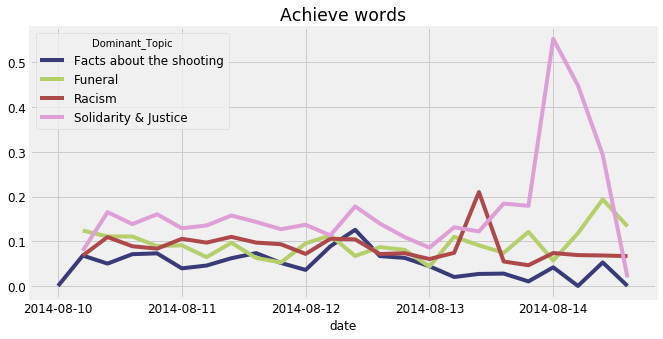

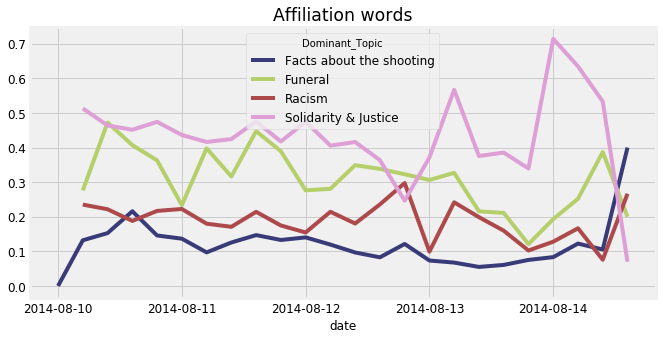

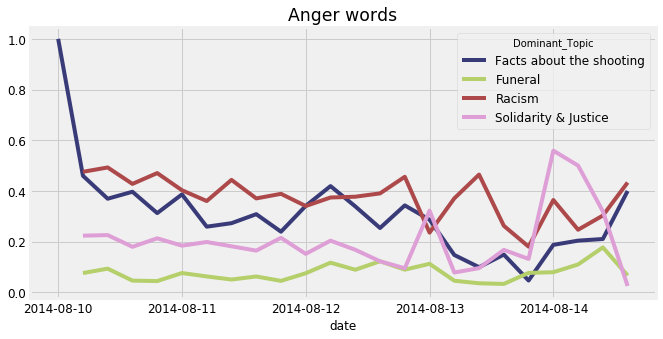

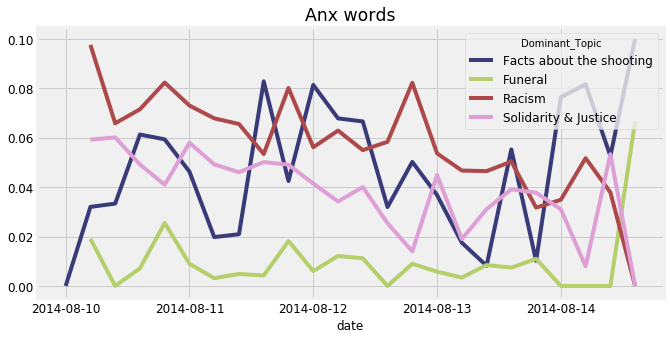

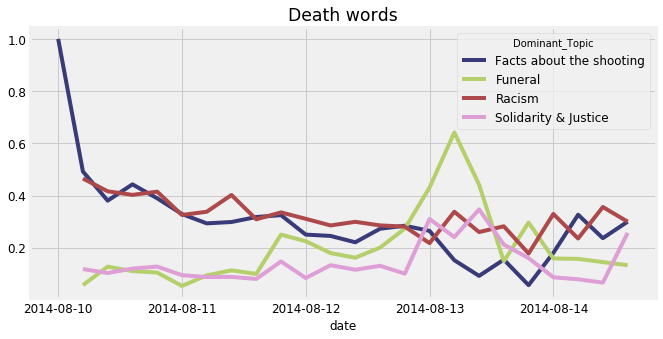

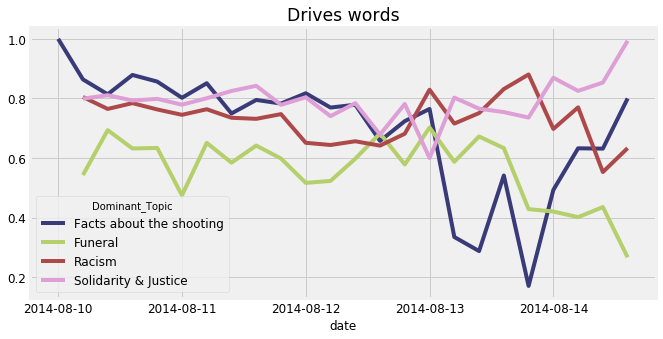

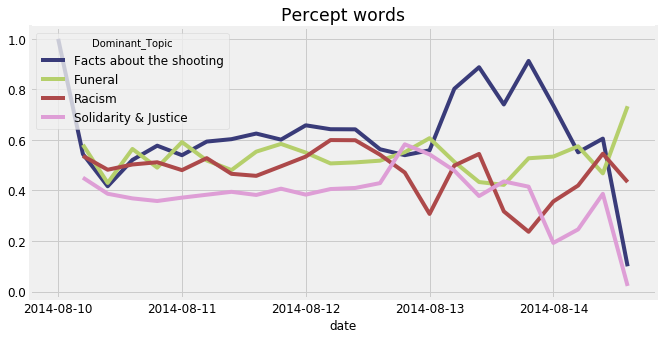

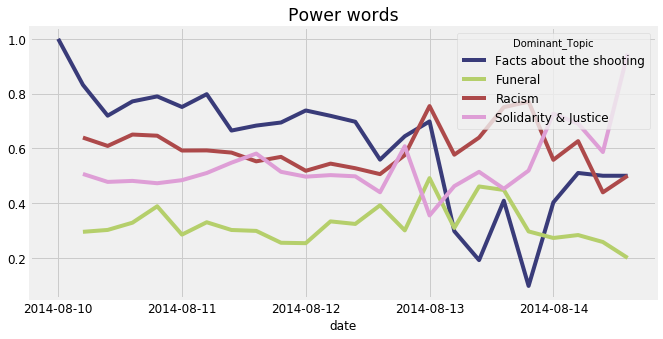

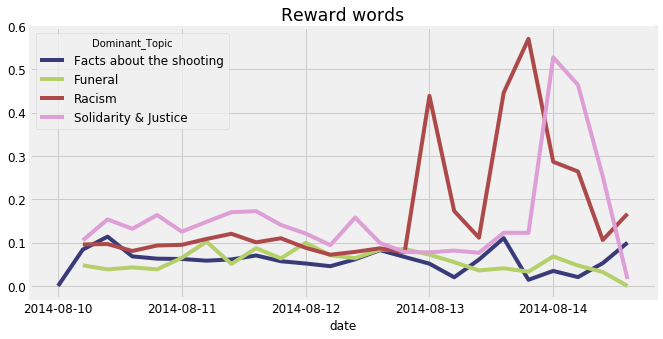

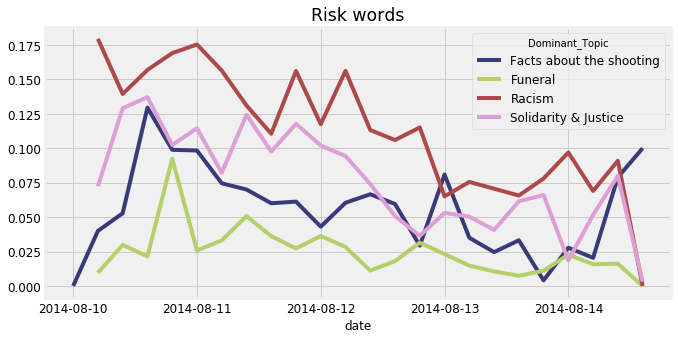

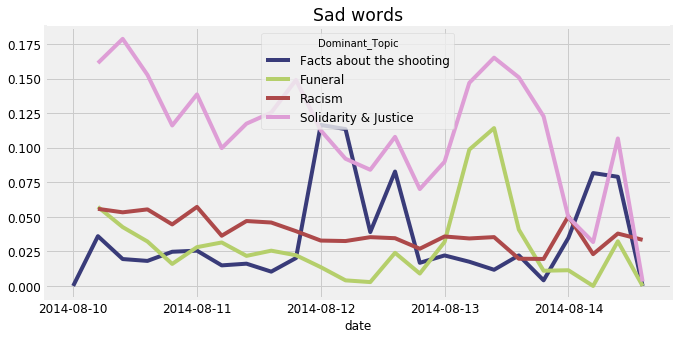

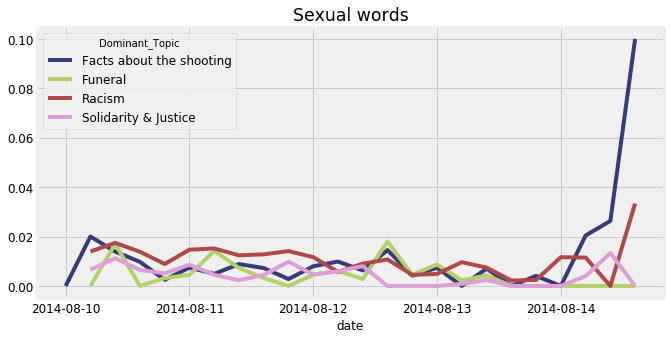

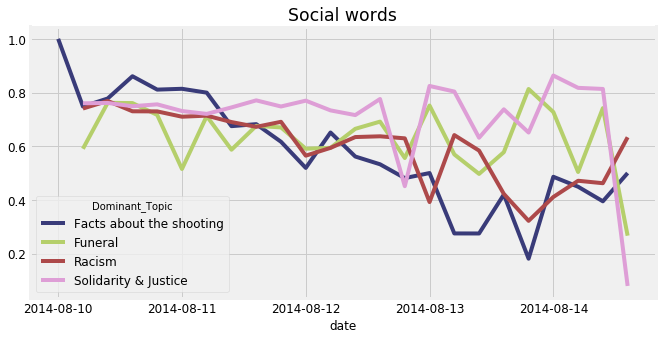

In [12]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
for i in pivoted_df_four.columns.levels[0]:
    pivoted_df_four[i].plot(colormap='tab20b')
    plt.gca().set_xticklabels(pivoted_df_four.index.values)
    plt.title('%s'%i.replace('_', ' '))


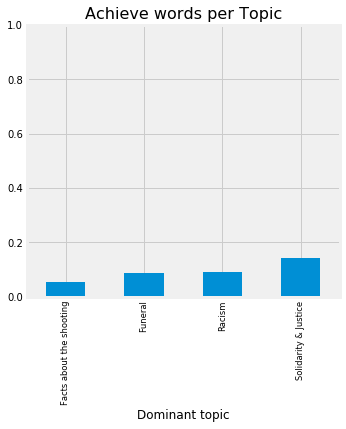

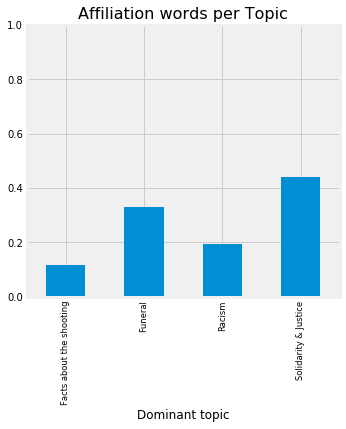

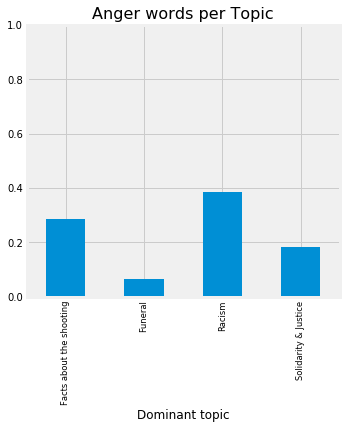

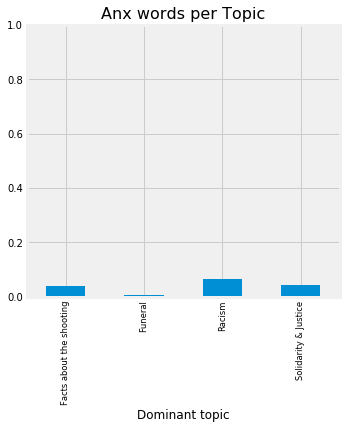

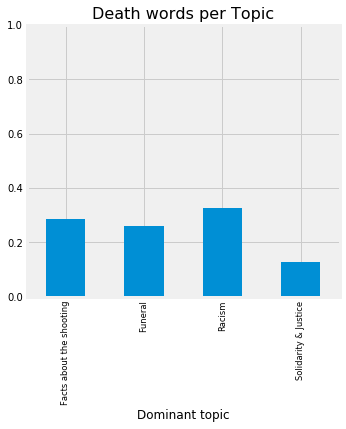

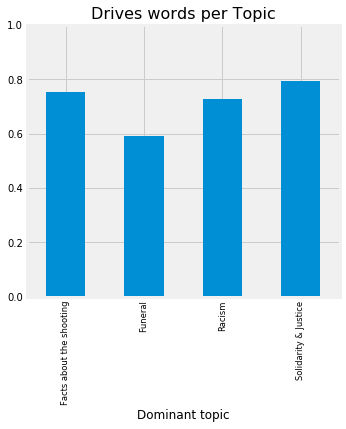

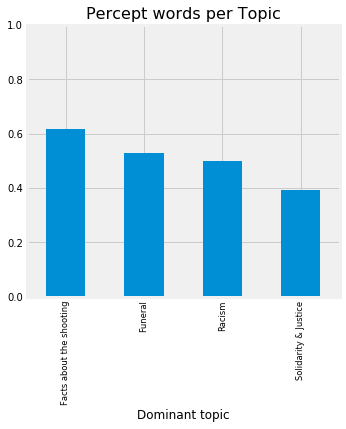

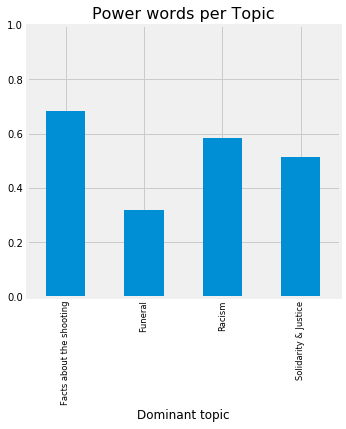

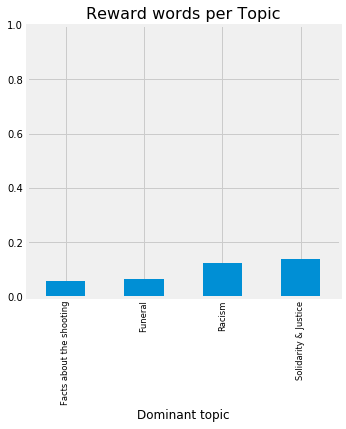

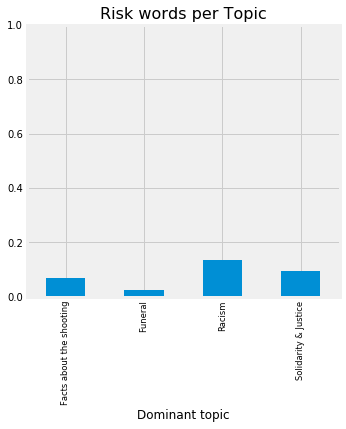

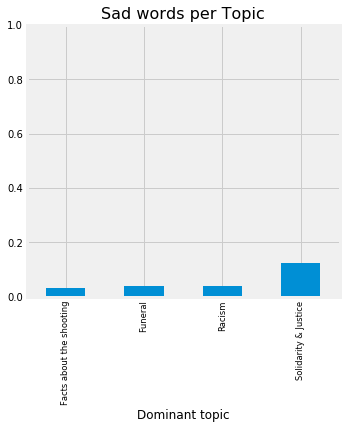

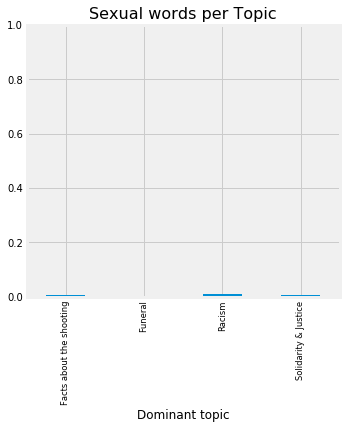

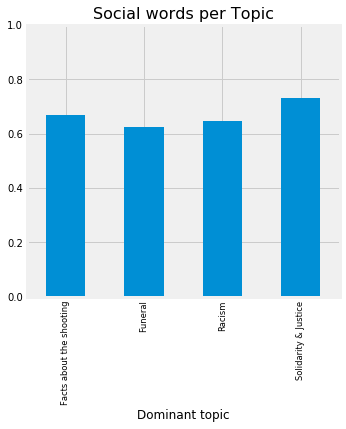

In [13]:

params = {'legend.fontsize': 'x-small',
#           'figure.figsize': (15, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'xx-small'}
pylab.rcParams.update(params)
df_keys= ['Achieve_words', 'Affiliation_words', 'Anger_words', 'Anx_words', 'Death_words', 'Drives_words', 'Percept_words', 'Power_words', 'Reward_words', 'Risk_words', 'Sad_words', 'Sexual_words', 'Social_words']
for i in df_keys:
    four_topics.groupby('Dominant_Topic')[['%s'%i]].agg('mean').plot.bar(figsize=(5,5), legend=False)
    plt.ylim(0,1)
    plt.yticks(fontsize=10)
    plt.title('%s per Topic'%i.replace('_',' '), fontsize=16)
    plt.xlabel('Dominant topic', fontsize=12)


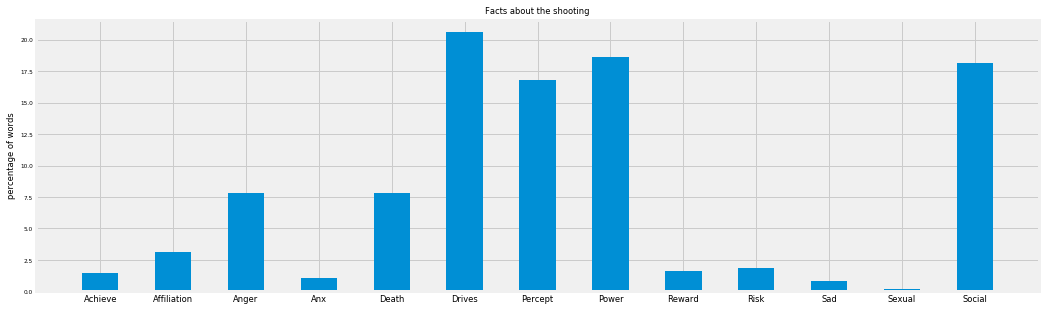

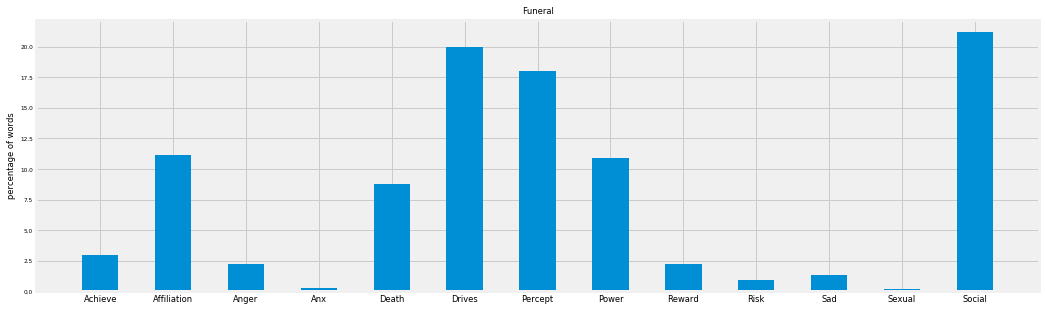

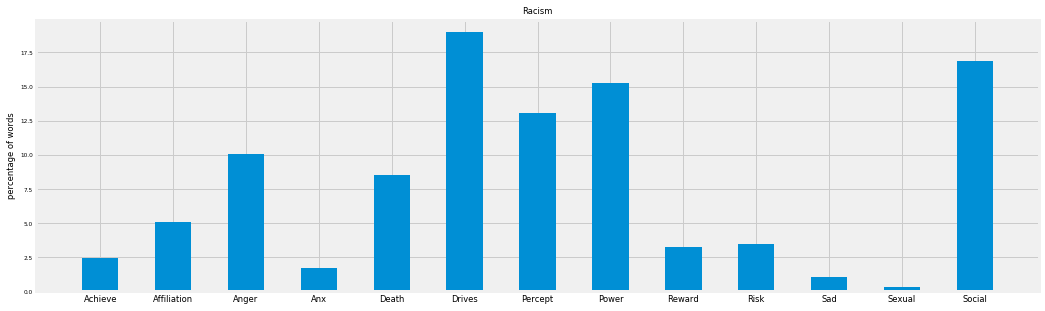

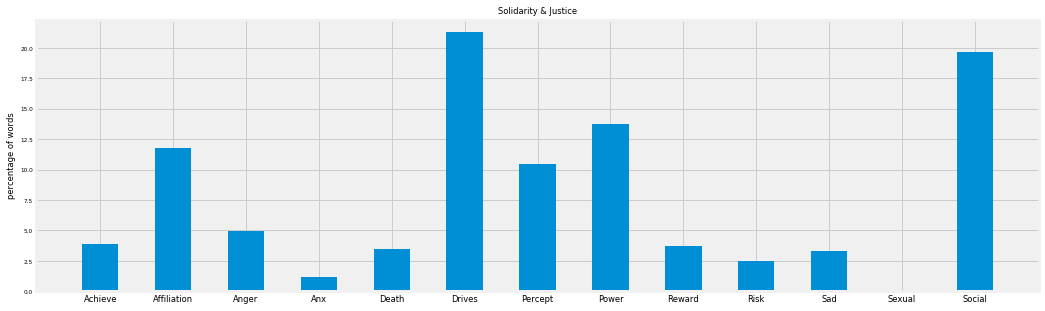

In [15]:
for topic in sorted(four_topics['Dominant_Topic'].unique().tolist()):
    key_names = [i.split('_')[0] for i in df_keys]
    sums =[]
    for i in df_keys:
        s = four_topics_liwc[four_topics['Dominant_Topic']==topic][str(i)].sum()
        sums.append(s)
    percs = sums/np.sum(sums)*100
    plt.figure()
    plt.bar(x=key_names, height=percs, width=0.5)
    plt.rcParams["figure.figsize"] = (16,5)
    plt.ylabel('percentage of words')
    plt.title('%s'%topic)
    

Note ** The percentages are calculated assuming the categories specified as keys are the only categories present in tweets.